In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 1

In [188]:
df = pd.read_csv("./data/website_ab_test.csv")
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


### 1. Formulate Hypotheses

- **H₀** - There is no difference if user has light or dark theme
- **H₁** - There is a difference

### 2. T-test

In [191]:
df_dark = df[df['Theme']=='Dark Theme']
df_dark

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
8,Dark Theme,0.110551,0.156945,0.735936,74.471533,44,New Delhi,1667,Yes,No
16,Dark Theme,0.302031,0.038236,0.784639,55.897541,18,Bangalore,802,No,No
18,Dark Theme,0.492174,0.214089,0.532467,35.468299,30,Chennai,1198,Yes,No
19,Dark Theme,0.493888,0.269696,0.755344,20.328167,62,Pune,489,No,No
...,...,...,...,...,...,...,...,...,...,...
992,Dark Theme,0.265413,0.381539,0.595636,49.783816,61,Pune,87,No,Yes
993,Dark Theme,0.212645,0.120536,0.741191,63.751085,38,Kolkata,1650,No,Yes
995,Dark Theme,0.282792,0.401605,0.200720,68.478822,25,Kolkata,321,Yes,Yes
996,Dark Theme,0.299917,0.026372,0.762641,73.019821,38,Chennai,1635,Yes,Yes


In [192]:
df_light = df[df['Theme']=='Light Theme']
df_light

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No
5,Light Theme,0.173419,0.266987,0.786825,66.120300,65,Chennai,1244,Yes,No
...,...,...,...,...,...,...,...,...,...,...
989,Light Theme,0.126083,0.416115,0.518858,57.394649,44,New Delhi,651,No,No
991,Light Theme,0.492991,0.293247,0.255914,56.857399,65,Pune,1025,Yes,Yes
994,Light Theme,0.144825,0.231131,0.523572,49.864467,32,Pune,322,Yes,No
997,Light Theme,0.370254,0.019838,0.607136,33.963298,32,Bangalore,1237,No,Yes


In [193]:
from scipy.stats import ttest_ind
import statistics

cols_to_test = ["Click Through Rate", 'Conversion Rate', 'Bounce Rate',	'Scroll_Depth', 'Session_Duration']

rates = []
for col in cols_to_test:
    t_stat, p_value = ttest_ind(df_dark[col], df_light[col], equal_var=False)
    rates.append(p_value)

print(rates)
print(statistics.mean(rates))

[np.float64(0.04818435371010704), np.float64(0.6349982678451778), np.float64(0.229692077505148), np.float64(0.4496919249484911), np.float64(0.7242292543366338)]
0.4173591756691115


### 3. Interpretation:
We failed to reject the null hypothesis in nearly every numerical metrics, thus we can say there is no difference between light and dark themes.
Since neither theme performs better, designers may choose any of them.

# Task 2

In [196]:
df = pd.read_csv("./data/insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [197]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Target value is pretty unbalanced, resampaling may be needed

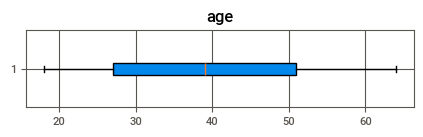

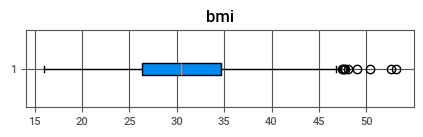

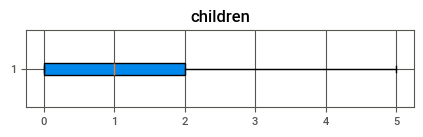

In [199]:
col_to_plot = ['age', 'bmi', 'children']

for col in col_to_plot:
    plt.figure(figsize=(5, 1))
    plt.boxplot(df[col], patch_artist=True, vert=False)
    plt.title(col)
    plt.grid(True)
    plt.show()

We have some outliers at bmi column, but since there are not many of them we can just delete these rows later

In [201]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No need handaling nans

In [203]:
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0}).astype(int)

df.corr(numeric_only=True)['charges'].sort_values(ascending=False)

C:\Users\Hello\AppData\Local\Temp\ipykernel_8980\3704249998.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0}).astype(int)


charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

### Data cleaning

In [205]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

df = df[df['bmi'] < upper_bound]

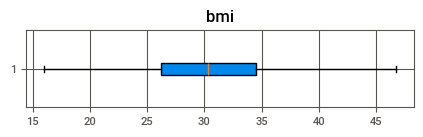

In [206]:
plt.figure(figsize=(5, 1))
plt.boxplot(df['bmi'], patch_artist=True, vert=False)
plt.title('bmi')
plt.grid(True)
plt.show()

# Task 3

In [208]:
df = pd.read_csv("./data/train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Focus on the survey items.

In [210]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [211]:
df.drop(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance'], axis=1, inplace=True)

### Check for missing values and handle them appropriately

In [213]:
df.isnull().sum()

Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [214]:
df.shape

(103904, 17)

Since we have small amount of outliers we can safely remove them

In [216]:
df.dropna()
df.shape

(103904, 17)

### Determining the number of factors

C:\Users\Hello\miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


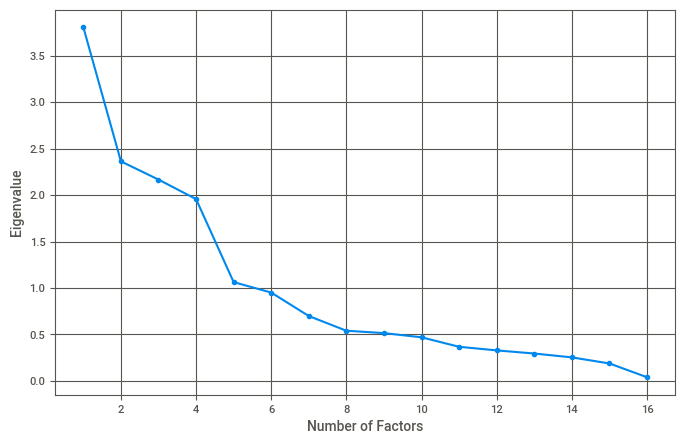

In [218]:
from factor_analyzer import FactorAnalyzer

X = df.drop(columns=['satisfaction'])

fa = FactorAnalyzer(rotation="varimax")
fa.fit(X_scaled)
ev, v = fa.get_eigenvalues()

plt.figure(figsize=(8,5))
plt.plot(range(1, len(ev)+1), ev, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [240]:
n_factors = sum(ev > 2)
print(f"Number of factors to extract: {n_factors}")

Number of factors to extract: 3


### Performing EFA

C:\Users\Hello\miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


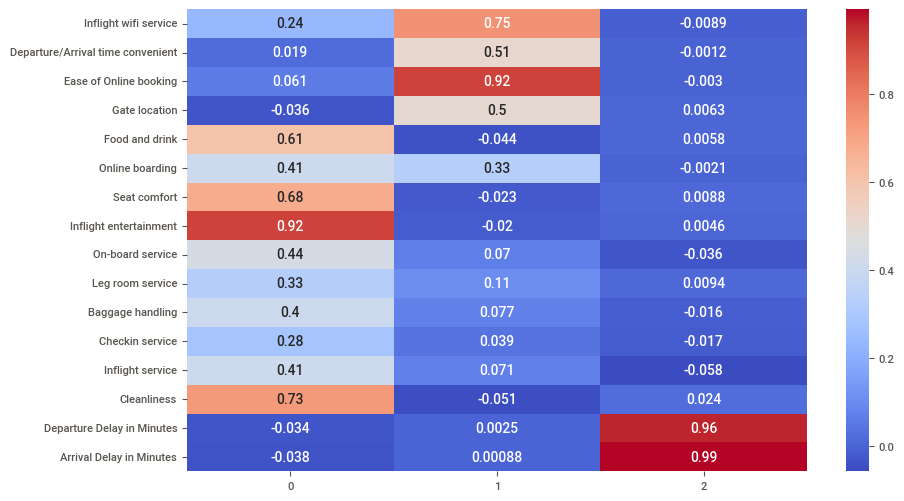

In [251]:
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax")
fa.fit(X)

loadings = pd.DataFrame(fa.loadings_, index=X.columns)

plt.figure(figsize=(10,6))
sns.heatmap(loadings, cmap="coolwarm", annot=True)
plt.show()

### Interpret the factor loadings

#### Factor 0
Based on:
- Inflight entertainment
- Cleanliness
- Seat comfort
- Food and drink<br>

Conclusion - possibly describes <b>inflight comfort and ameneties

#### Factor 1
Based on:
- Ease of Online booking
- Inflight wifi service
- Departure/Arrival time convenient
- Gate location<br>

Conclusion - possibly describes <b>booking and boarding convenience 

#### Factor 2
Based on:
- Departure Delay in Minutes   
- Arrival Delay in Minutes<br>

Conclusion - possibly describes <b>arrival/departure delay

### Summarize 
These factors can help flight company to understand what aspects they shoud focus on improving